## 선형회귀분석 오류 
* 곤충질량(g)에 따라 암수구분하는 모델 생성
* 0 : 암, 1 : 수



In [6]:
X = wght = [1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6]
y = spcs = [1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0]

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

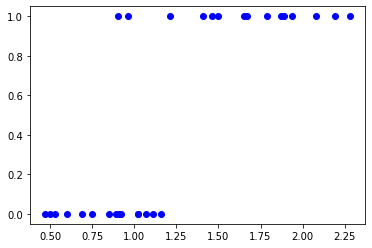

In [17]:
# 시각화
plt.plot(X,y, 'bo')

In [10]:
# 단순 선형 회귀 실시해보자
X = np.array(X).reshape(-1,1)
lrclf = LinearRegression()
lrclf.fit(X,y)
pred = lrclf.predict(X)

In [11]:
# 선형모델 계수
a = lrclf.coef_
b = lrclf.intercept_   # 절편

print(a,b)         # 9.1  -34.67

[0.74825276] -0.43007818056050295


In [14]:
# 모델 성능 평가
rmse = np.sqrt(mean_squared_error(y,pred))
r2 = r2_score(y,pred)
print(rmse, r2)      # 6.6  0.48

0.3106178929591639 0.6140660982944375


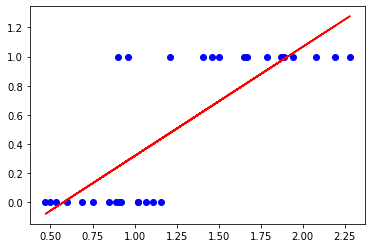

In [22]:
# 회귀선 시각화
z = lrclf.predict(X)
plt.plot(X,y, 'bo')
plt.plot(X,z, 'r-')

In [44]:
wght = [1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6]
spcs = [1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0]

In [20]:
# 선형회귀 분석
lr = LinearRegression()
lr.fit(np.array(wght).reshape(-1,1),spcs)

lr.coef_, lr.intercept_

(array([0.74825276]), -0.43007818056050295)

In [27]:
pred = lr.predict(np.array(wght).reshape(-1,1))
r2_score(spcs,pred)  # 결정계수 값

0.6140660982944375

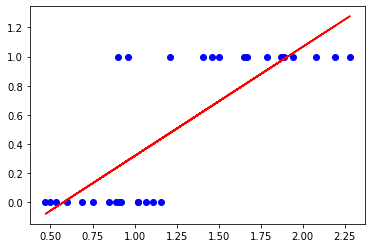

In [28]:
plt.plot(wght, spcs, 'bo')
plt.plot(wght,z,'r-')   # 0.61

## 종속변수가 범주형인 경우
* 선형방정식은 이항분보를 따르는 데이터에 적용하기에 다소 맞지 않는다.
    + $ y = ax + b $
* 즉, 우변값의 범위는 ' -무한대~ +무한대 '이지만, 좌변값의 범위는 '0~1' 이다.
* 따라서, 좌변값의 범위를 우변과 동일하게 '-무한대~+무한대'로 하려면 적절한 변환함수가 필요
    + 로짓함수를 이용해서 변환함
    + ### $ f(x) = \frac {1} {1 + e^2{-x}} $

In [46]:
# 로짓함수 정의
def logistic(x, w):
    yy = 1 / (1 + np.exp(-(w[0]*x + w[1])))
    return yy

In [77]:
# 로짓함수를 이용해서 다시 그래프를 그림
W = [8, -10]  # 기울기와 절편을 임의로 지정
xx = np.linspace(0.5, 2.25, 50)  # 0.5~2.25내 50 개 값 생성 
yy = logistic(xx, W)

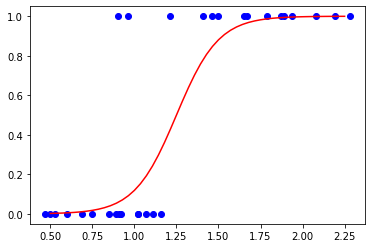

In [78]:
plt.plot(wght,spcs,'bo')
plt.plot(xx.reshape(-1,1), yy, 'r-')

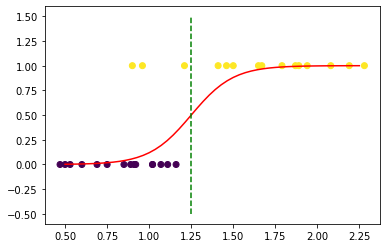

In [79]:
# 결정경계 표시 (yy가 0.5이상 되는 지점 확인)
plt.scatter(pd.Series(wght),pd.Series(spcs), c=spcs)
plt.plot(xx,yy,'r-')

i = np.min(np.where(yy >= 0.5))
xp = (xx[i])
plt.plot([xp,xp], [-.5,1.5], 'g--')

임계값 [1.07142857]


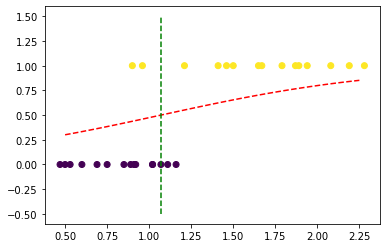

In [94]:
# sklearn에서 제공하는 LogisticRegression으로 분석
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = np.array(wght).reshape(-1,1)
y = spcs

# solver : sklearn 20.x 이상부터는 명시적 지정 필요 
# liblinear : 이항회귀, 비교적 작은 데이터셋에 적합
# lbfgs, newton-cg : 다항 회귀, L1제약
# sag, saga : 다항회귀, L2제약, 확률적경사하강법 적용

# multi_class  = 'multinomial'  # 다항회귀 설정
lrclf = LogisticRegression(solver='liblinear')
lrclf.fit(X,y)
pred = lrclf.predict(X)

accuracy_score(y,pred) # 0.9

plt.scatter(X,y,c=y)

xx = np.linspace(0.5, 2.25, 50).reshape(-1,1)
yy = lrclf.predict_proba(xx)     # 0.1일 확률
plt.plot(xx, yy[:,1],'r--')

i = np.min(np.where(yy[:, 1] >= 0.5))
xp = xx[i]
plt.plot([xp,xp], [-.5, 1.5], 'g--')
print('임계값', xp)

In [90]:
# xx = np.linspace(0.5, 2.25, 50).reshape(-1,1)
# yy = lrclf.predict_proba(xx)
# plt.plot(xx, yy[:, 1],'r-')

# i = np.min(np.where(yy[:, 1] >= 0.5))
# xp = xx[i]
# plt.plot([xp,xp], [-.5, 1.5], 'r-')
# print('임계값', xp)

## iris 데이터셋을 이용한 로지스틱 회귀
* 4+1 변수, 150개 데이터로 구성 
* 결과값은 3가지 : setosa, versicolor, verginica

In [105]:
# 꽃잎너비, 레이블이 verginica인 경우에 대한 경계값 알아보기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data,iris.target, test_size = 0.3, stratify=iris.target, random_state=2111091510)

lrclf = LogisticRegression(solver='sag', multi_class='multinomial', C = 0.01)

lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

accuracy_score(ytest, pred)  # 0.84


0.8444444444444444

In [107]:
X = iris.data[:, 3]  # petal width
y = (iris.target == 2).astype(np.int32)

np.min(X), np.max(X)

y[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [110]:
lrclf = LogisticRegression(solver='liblinear')
lrclf.fit(X.reshape(-1,1), y)

LogisticRegression(solver='liblinear')

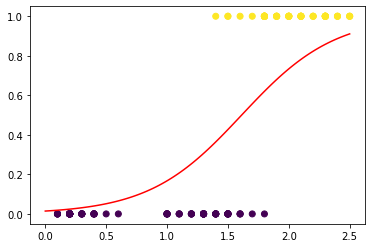

In [114]:
plt.scatter(X,y,c=y)

xx = np.linspace(0,2.5, 100).reshape(-1,1)
yy = lrclf.predict_proba(xx)
plt.plot(xx, yy[:,1], 'r')


임계값 [1.61616162]


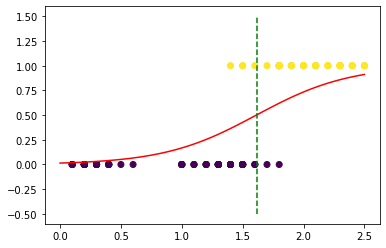

In [117]:
# 임계값 확인
plt.scatter(X,y,c=y)

xx = np.linspace(0,2.5, 100).reshape(-1,1)
yy = lrclf.predict_proba(xx)
plt.plot(xx, yy[:,1], 'r')


i = np.min(np.where(yy[:, 1] >= 0.5))
xp = xx[i]
plt.plot([xp,xp], [-.5, 1.5], 'g--')
print('임계값', xp)

## 결정경계 시각화
* iris의 feature를 2개로 나눠 재학습


In [119]:
# 시각화를 위해 두 변수만 지정
data = iris.data[:, :2] # Sepal 속성만
# data = iris.data[:,2:] # petal 속성만

target = iris.target

# 분석시작
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data, target)
print(lrclf.score(data, target))  # 훈련 정확도

0.82


In [147]:
# pcolormesh 함수 사용시 필요하다!
plt.rcParams['pcolor.shading'] = 'nearest'

In [120]:
# 다항 로지스틱 결정경계 시각화
x_min = data[:,0].min() - 0.5 # x축 최대/최소
x_max = data[:,0].max() + 0.5

y_min = data[:,1].min() - 0.5 # y축 최대/최소
y_max = data[:,1].max() + 0.5


In [121]:
# x/y축 범위의 값들 생성
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)

In [138]:
# 생성한 값들을 x,y쌍으로 좌표평면에 배치
# 즉, 예측값을 나타낼 좌표평면 지정
xx, yy = np.meshgrid(xm, ym)


In [142]:
xx[:1]

array([[3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 , 3.92, 3.94, 3.96, 3.98, 4.  ,
        4.02, 4.04, 4.06, 4.08, 4.1 , 4.12, 4.14, 4.16, 4.18, 4.2 , 4.22,
        4.24, 4.26, 4.28, 4.3 , 4.32, 4.34, 4.36, 4.38, 4.4 , 4.42, 4.44,
        4.46, 4.48, 4.5 , 4.52, 4.54, 4.56, 4.58, 4.6 , 4.62, 4.64, 4.66,
        4.68, 4.7 , 4.72, 4.74, 4.76, 4.78, 4.8 , 4.82, 4.84, 4.86, 4.88,
        4.9 , 4.92, 4.94, 4.96, 4.98, 5.  , 5.02, 5.04, 5.06, 5.08, 5.1 ,
        5.12, 5.14, 5.16, 5.18, 5.2 , 5.22, 5.24, 5.26, 5.28, 5.3 , 5.32,
        5.34, 5.36, 5.38, 5.4 , 5.42, 5.44, 5.46, 5.48, 5.5 , 5.52, 5.54,
        5.56, 5.58, 5.6 , 5.62, 5.64, 5.66, 5.68, 5.7 , 5.72, 5.74, 5.76,
        5.78, 5.8 , 5.82, 5.84, 5.86, 5.88, 5.9 , 5.92, 5.94, 5.96, 5.98,
        6.  , 6.02, 6.04, 6.06, 6.08, 6.1 , 6.12, 6.14, 6.16, 6.18, 6.2 ,
        6.22, 6.24, 6.26, 6.28, 6.3 , 6.32, 6.34, 6.36, 6.38, 6.4 , 6.42,
        6.44, 6.46, 6.48, 6.5 , 6.52, 6.54, 6.56, 6.58, 6.6 , 6.62, 6.64,
        6.66, 6.68, 6.7 , 6.72, 6.74, 

In [136]:
yy[:3]

array([[1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ,
        1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 

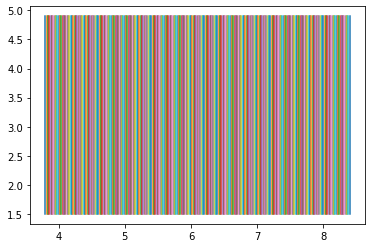

In [139]:
# 지금까지의 작업 확인
plt.plot(xx, yy)
plt.show()

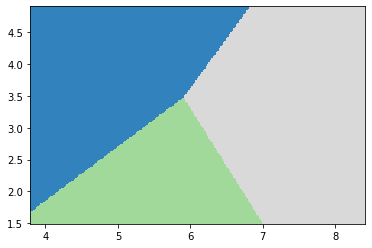

In [146]:
# 위에서 만든 x,y 좌표쌍을 모델을 통해 예측
# pcolormesh : 내장된 칼라맵을 통해 지정한 위치에 히트맵을 그려주는 함수 
# pcolormesh(x좌표, y좌표, 색강값, 칼라맵 
results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = result.reshape(xx.shape)
plt.pcolormesh(xx, yy, results, cmap=plt.cm.tab20c)
plt.show()

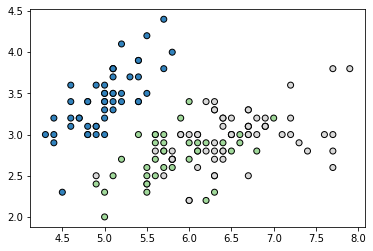

In [149]:
# 원본데이터를 산점도에 표시
plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()

In [ ]:
# 시각화를 위헤 두 변수만 지정 ( petal 게열)

In [ ]:
d

In [150]:
data = iris.data[:,2:] # petal 속성만

target = iris.target

# 분석시작
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data, target)
print(lrclf.score(data, target))  # 훈련 정확도

0.9666666666666667


In [151]:
# 다항 로지스틱 결정경계 시각화
x_min = data[:,0].min() - 0.5 # x축 최대/최소
x_max = data[:,0].max() + 0.5

y_min = data[:,1].min() - 0.5 # y축 최대/최소
y_max = data[:,1].max() + 0.5


In [152]:
# x/y축 범위의 값들 생성
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)

In [159]:
# results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
# results = result.reshape(xx.shape)
# plt.pcolormesh(xx, yy, results, cmap=plt.cm.tab20c)
# plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
# # plt.show()

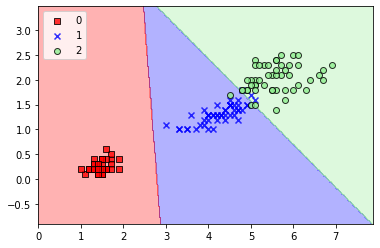

In [157]:
import mldlpy3

mldlpy3.plot_decision_regions(data, target, lrclf)